# Overview

inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.

Normally, we use Euclidean distance as the distance metric, as long as most of the features are numeric; 
otherwise, Manhattan distance in case most of the features are categorical

In [8]:
# import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


In [9]:
# Reading the data
data = pd.read_csv('clustering.csv')
data.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


Gonna take only the “LoanAmount” and “ApplicantIncome" vars


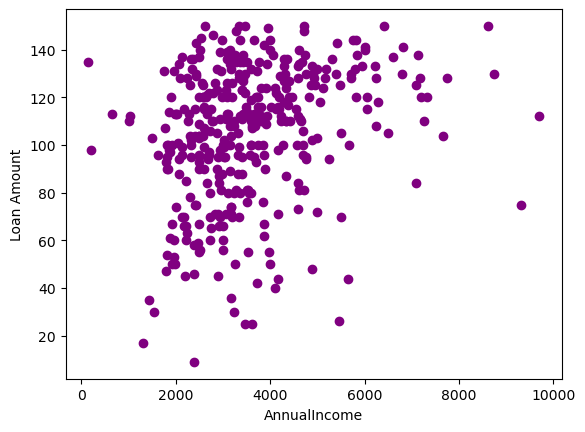

In [16]:
X = data[["LoanAmount","ApplicantIncome"]]

plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='purple')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount')
plt.show()

### Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster


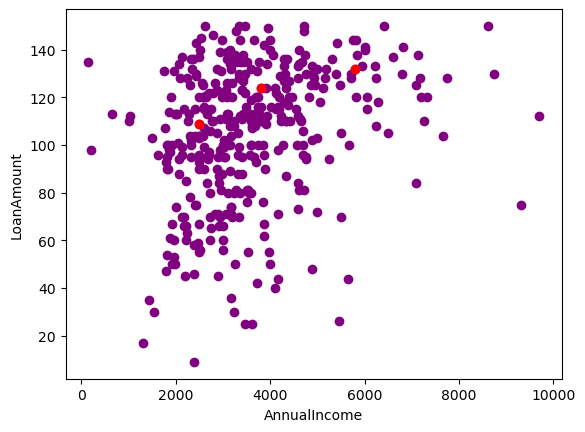

In [18]:
k = 3 # gonna choose 3 clusters

Centroids = (X.sample(n=k))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c= 'purple')
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('LoanAmount')
plt.show()

### Step 3 - Assign all the points to the closest cluster centroid
### Step 4 - Recompute centroids of newly formed clusters
### Step 5 - Repeat step 3 and 4


In [21]:
print(Centroids)
X.head()

         LoanAmount  ApplicantIncome
Cluster                             
1        109.756410      4033.596154
2         97.472527      2497.972527
3        119.488372      6512.767442


,LoanAmount,ApplicantIncome,1,2,3,Cluster
0,128.0,4583,549.706662,2085.250941,1929.786213,1
1,66.0,3000,1034.521934,503.013025,3513.174648,2
2,120.0,2583,1450.632322,87.961117,3929.767475,2
3,141.0,6000,1966.652040,3502.297968,513.218472,3
4,95.0,2333,1700.660175,164.991055,4179.839177,2


In [22]:
diff = 1
j=0
#ED represents the euclideen distance

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows(): # here we goona calculate the distance between every centroid in row_c and the point tubples coming from row_d
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    
    #in order to update the centroids we'll calculate the mean
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/tmp/ipykernel_22886/3472790498.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
/tmp/ipykernel_22886/3472790498.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
/tmp/ipykernel_22886/3472790498.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

0.0


/tmp/ipykernel_22886/3472790498.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


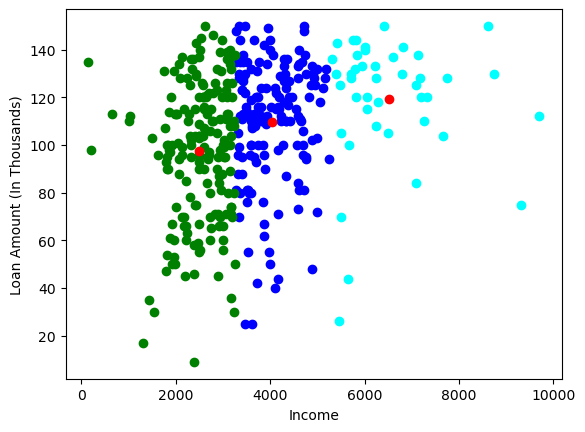

In [24]:
color=['blue','green','cyan']
for k in range(k):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()  